In [ ]:
import pandas as pd

# Step 1: Load the dataset without headers
df = pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")

# Preview the first 5 rows
print(df.head())


                                            2.5  6.3639610307   108  38  \
443 90243344 9  9  3683 3111 3123 0  409.222222   1024.219920  1400   0   
    297680   2  0  12   0    6    6    6.000000      0.000000     0   0   
80  5517560  3  1  12   2    6    0    4.000000      3.464102     2   2   
    5517703  3  1  12   0    6    0    4.000000      3.464102     0   0   
22  1699816  35 42 2686 6718 408  0   76.742857    105.426959   976   0   

                                             73  49.4974746831  9.7282090013  \
443 90243344 9  9  3683 3111 3123 0  345.666667     569.874548     75.285331   
    297680   2  0  12   0    6    6    0.000000       0.000000     40.311744   
80  5517560  3  1  12   2    6    0    2.000000       0.000000      2.537353   
    5517703  3  1  12   0    6    0    0.000000       0.000000      2.174818   
22  1699816  35 42 2686 6718 408  0  159.952381     317.544001   5532.363503   

                                     0.1684538355       7915126  \
4

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129519 (\N{FIRE EXTINGUISHER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


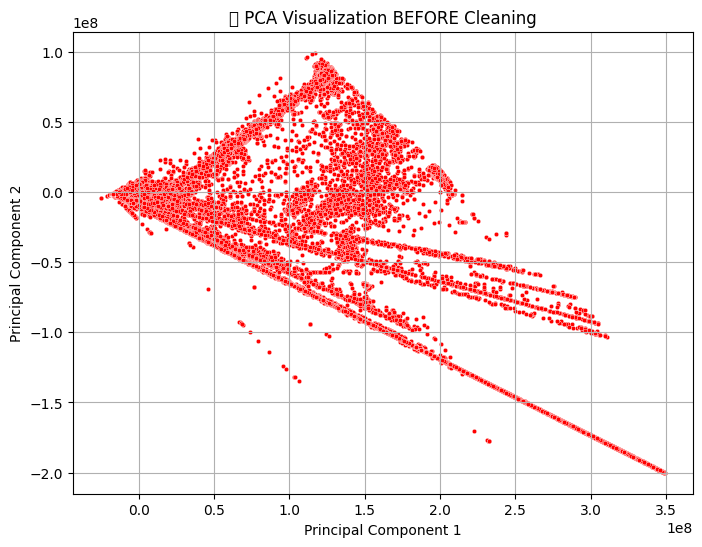

In [ ]:
# 🧪 PCA Visualization of Raw Data (Before Cleaning)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Make sure your raw_df is already loaded as in previous step
# If not, load again:
# raw_df = pd.read_csv("your_file.csv", header=None)
# raw_df.columns = [f"F{i}" for i in range(raw_df.shape[1] - 1)] + ["Label"]

# Handle NaNs just for PCA, without modifying original data
raw_features = df.drop(columns=["Label"], errors='ignore').fillna(0)

# Apply PCA
pca_raw = PCA(n_components=2).fit_transform(raw_features)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_raw[:, 0], y=pca_raw[:, 1], s=10, color='red')
plt.title("🧯 PCA Visualization BEFORE Cleaning")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
# Rename columns: F0, F1, ..., F69, Label
df.columns = [f"F{i}" for i in range(df.shape[1] - 1)] + ["Label"]

# Confirm new column names
print(df.columns)


Index(['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30',
       'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
       'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50',
       'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60',
       'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'Label'],
      dtype='object')


In [ ]:
# Step 3a: Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"🔁 Duplicate rows: {num_duplicates}")

# Step 3b: Check for missing (NaN) values
missing_values = df.isnull().sum().sum()
print(f"❓ Missing values: {missing_values}")

# Step 3c: Check for infinities
import numpy as np
has_inf = np.isinf(df.select_dtypes(include=[np.number])).values.any()
print(f"∞ Infinite values: {has_inf}")



🔁 Duplicate rows: 66856
❓ Missing values: 58
∞ Infinite values: True


In [ ]:
# Step 4a: Drop duplicates
df = df.drop_duplicates()
print(f"✅ Shape after dropping duplicates: {df.shape}")

# Step 4b: Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 4c: Drop all rows with NaNs
df.dropna(inplace=True)



✅ Shape after dropping duplicates: (423758, 72)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder and fit on Label column
encoder = LabelEncoder()
df["Label_encoded"] = encoder.fit_transform(df["Label"])

# Show label mapping
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("🧠 Label Mapping:")
print(label_mapping)


🧠 Label Mapping:
{'BENIGN': np.int64(0)}


In [ ]:
X = df.drop(columns=["Label", "Label_encoded"])
y = df["Label_encoded"]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


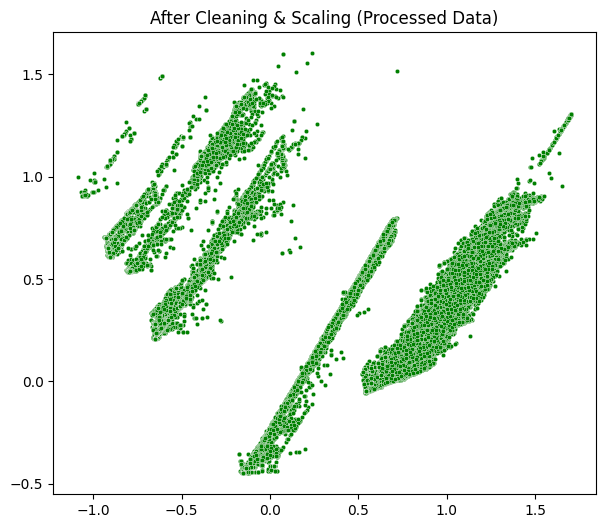

In [ ]:
# 🔍 Step 9: PCA Visualization After Preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca_clean = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
sns.scatterplot(x=pca_clean[:, 0], y=pca_clean[:, 1], s=10, color='green')
plt.title("After Cleaning & Scaling (Processed Data)")
plt.show()

In [ ]:
cleaned_df = df.copy()
cleaned_df.to_csv("Monday_Cleaned_Preprocessed.csv", index=False)


/tmp/ipython-input-30-2083799526.py:37: UserWarning: Glyph 129519 (\N{FIRE EXTINGUISHER}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
/tmp/ipython-input-30-2083799526.py:37: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129519 (\N{FIRE EXTINGUISHER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


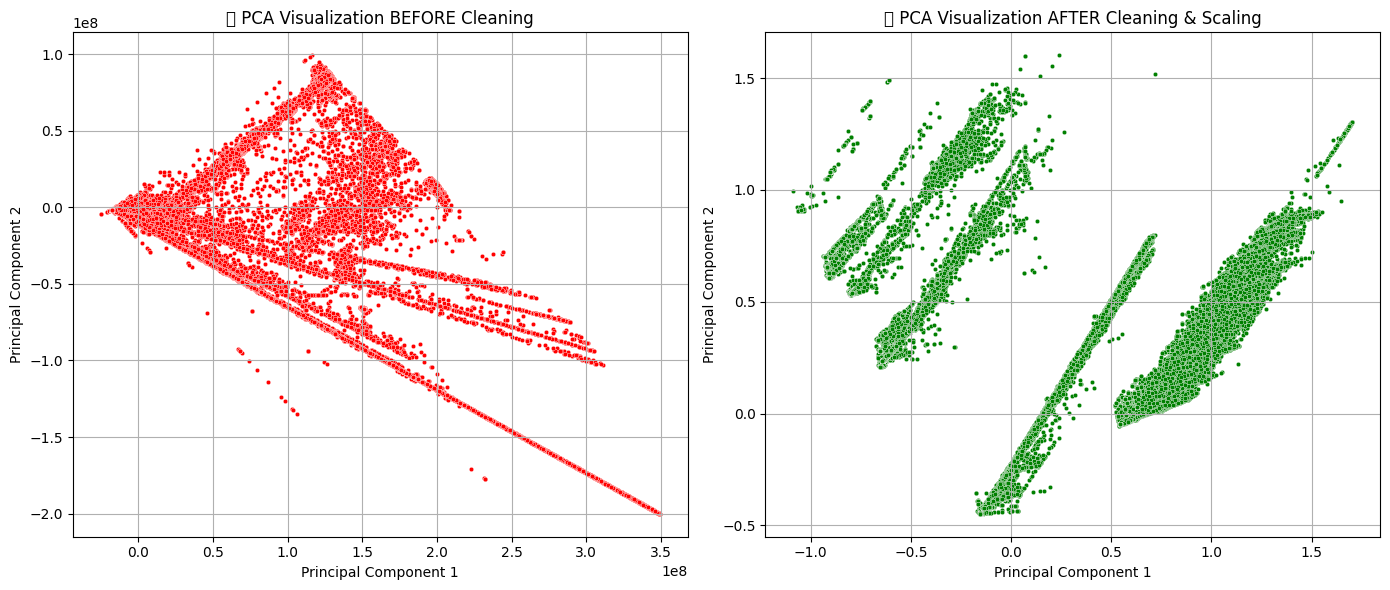

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'df' contains your original data as loaded initially
# Assuming 'X_scaled' contains your data after cleaning and scaling

# Re-generate PCA for raw data (as in cell W7BD9rtDXZtU)
# Handle NaNs just for PCA, without modifying original data
raw_features = df.drop(columns=["Label"], errors='ignore').fillna(0)
pca_raw = PCA(n_components=2).fit_transform(raw_features)

# Re-generate PCA for cleaned and scaled data (as in cell EWswc-9zUZCD)
pca_clean = PCA(n_components=2).fit_transform(X_scaled)


# Create subplots for side-by-side comparison
plt.figure(figsize=(14, 6))

# Plot for raw data
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x=pca_raw[:, 0], y=pca_raw[:, 1], s=10, color='red')
plt.title("🧯 PCA Visualization BEFORE Cleaning")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Plot for cleaned and scaled data
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x=pca_clean[:, 0], y=pca_clean[:, 1], s=10, color='green')
plt.title("✅ PCA Visualization AFTER Cleaning & Scaling")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

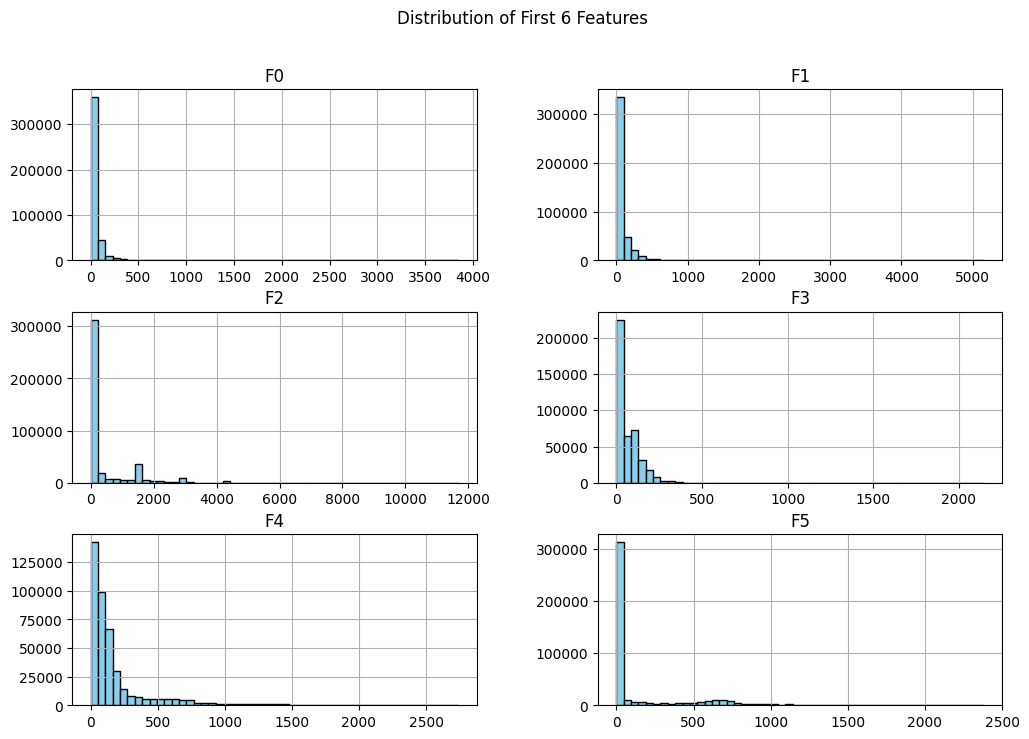

In [ ]:
X.iloc[:, :6].hist(bins=50, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of First 6 Features")
plt.show()


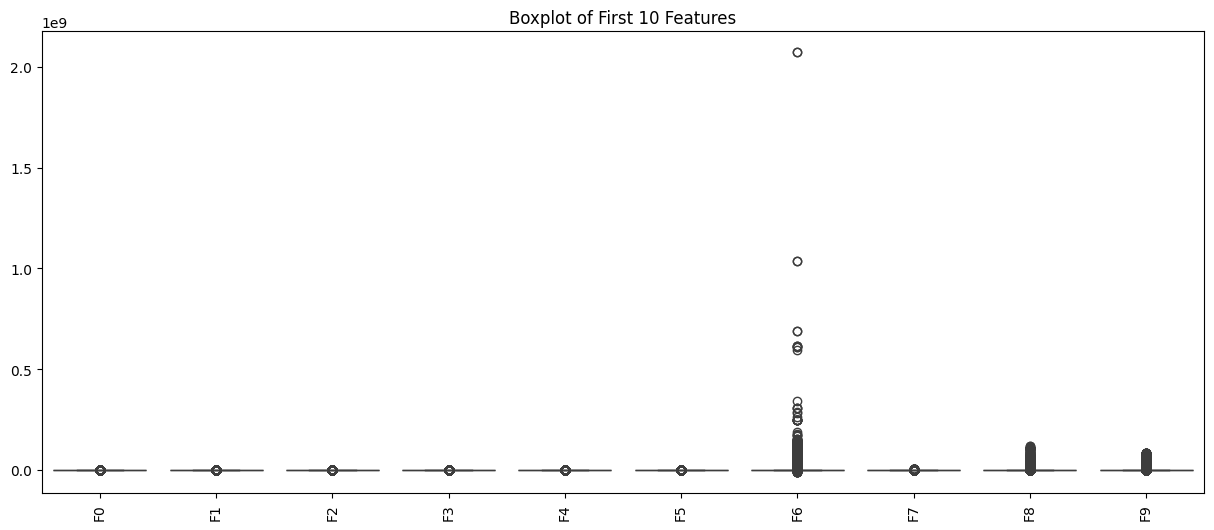

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=X.iloc[:, :10])
plt.xticks(rotation=90)
plt.title("Boxplot of First 10 Features")
plt.show()


Isolation Forest Anomaly Detection Results:
[[415282   8476]
 [     0      0]]
              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99    423758
     Anomaly       0.00      0.00      0.00         0

    accuracy                           0.98    423758
   macro avg       0.50      0.49      0.49    423758
weighted avg       1.00      0.98      0.99    423758



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


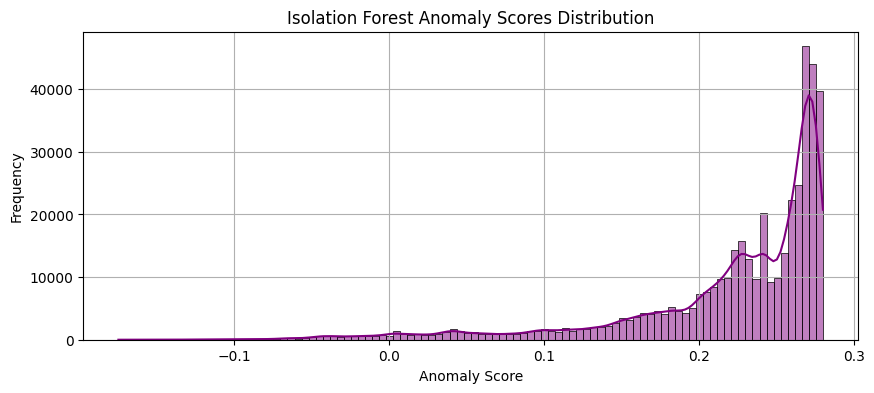

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🏋️ Step 1: Train Isolation Forest on scaled features
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
model.fit(X_scaled)

# 🔍 Step 2: Predict anomalies (returns 1 for inliers, -1 for outliers)
y_pred = model.predict(X_scaled)

# 🔄 Step 3: Convert to binary format: 0 = BENIGN, 1 = Anomaly
y_pred_bin = np.where(y_pred == -1, 1, 0)

# 🧾 Step 4: Report performance (remember: we only have class 0)
print("Isolation Forest Anomaly Detection Results:")
print(confusion_matrix(np.zeros_like(y_pred_bin), y_pred_bin))
print(classification_report(np.zeros_like(y_pred_bin), y_pred_bin, target_names=["BENIGN", "Anomaly"]))

# 📊 Step 5: Visualize anomaly score
anomaly_scores = model.decision_function(X_scaled)

plt.figure(figsize=(10, 4))
sns.histplot(anomaly_scores, bins=100, kde=True, color="purple")
plt.title("Isolation Forest Anomaly Scores Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
